<h1>Introduction</h1>
<h3>$GOOGL Stock Price Prediction with LSTM </h4>
This project aims to predict Google (GOOGL) stock prices using Long Short-Term Memory (LSTM), a well-suited option for time-series forecasting. The dataset used includes historical stock prices from Yahoo Finance.
<h3>Objective</h3>

- Predict future stock prices based on historical data.

- Evaluate the model's performance using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score.


<h3>Libraries Used</h3>


- TensorFlow/Keras: For building the LSTM model.
- Scikit-learn: For data preprocessing and evaluation metrics.
- Matplotlib: For visualizations.
- Yahoo Finance API: For downloading the stock data.

<h3>Data Preprocessing</h3>

1. The historical stock prices were downloaded using the `yfinance` library.
2. Only the `Close` price was used for training and testing.
3. The data was scaled to the range [0, 1] using MinMaxScaler for better LSTM convergence.
4. Sliding windows of sequences were created using a custom `create_sequences` function, with a window size of 10.

<h3>The LSTM model was designed as follows:</h3>

1. Input: A sequence of 10 days' `Close` prices.
2. Layers:
   - LSTM Layer 1: 50 units, returns sequences.
   - LSTM Layer 2: 50 units, does not return sequences.
   - Dense Layer: 25 units.
   - Dense Layer: 1 unit (output layer).
3. Optimizer: Adam.
4. Loss Function: Mean Squared Error (MSE).
5. Early Stopping: Monitored validation loss with patience of 5 epochs.

In [2]:
import tensorflow as tf
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Google stock data from 2015 to today(11-28-2024)
stock_data = yf.download("GOOGL", start = "2015-01-01", end = "2024-11-28")


# Creating a scaled dataset as earlier
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data[['Close']])
scaled_data

/Users/king/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[*********************100%***********************]  1 of 1 completed


array([[0.00976691],
       [0.00673372],
       [0.00287987],
       ...,
       [0.85853169],
       [0.86736971],
       [0.86803106]])

<h4> Splitting the Data into training and testing sets </h4>

In [3]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaler.fit_transform(stock_data[['Close']].iloc[:train_size])
test_data = scaler.transform(stock_data[['Close']].iloc[train_size:])

<h4> Creating the Sequences </h4>

In [4]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(x), np.array(y)

sequence_length = 10
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

<h4> Building the LSTM Model </h4>

In [5]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fitting the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50


/Users/king/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0449 - val_loss: 0.0024
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7041e-04 - val_loss: 0.0015
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9333e-04 - val_loss: 0.0015
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0357e-04 - val_loss: 0.0018
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4249e-04 - val_loss: 0.0022
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8397e-04 - val_loss: 0.0039
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5558e-04 - val_loss: 0.0022
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1441e-04 - val_loss: 0.0021
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9796e-04 - val_loss: 0.0017
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1504e-04 - val_loss: 0.0015
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

<h4>Making Predictions</h4>

In [6]:

predictions = model.predict(x_test)
predictions_unscaled = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [9]:
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
r2 = r2_score(y_test_unscaled, predictions_unscaled)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 13.358607255058565
MAE: 2.800973311036155
R-squared: 0.9815553736956916


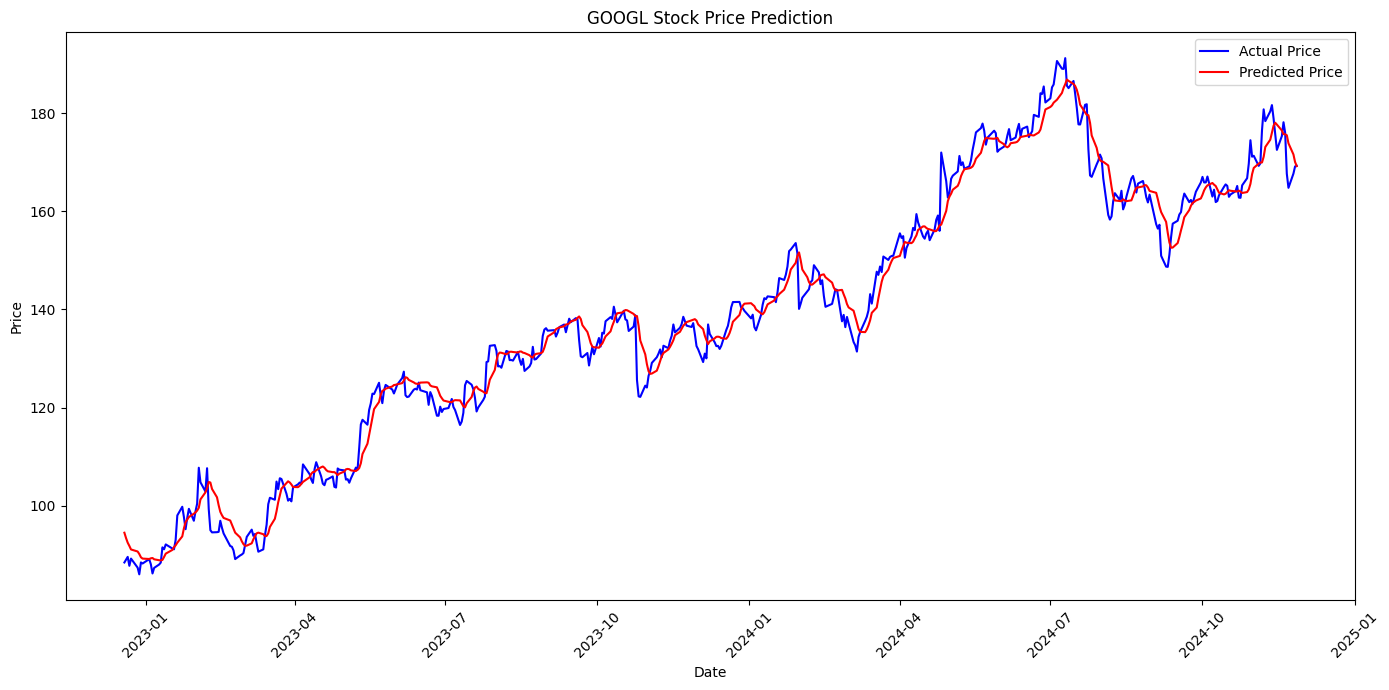

In [11]:
test_dates = stock_data.index[-len(y_test):]

plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_unscaled.flatten(), label='Actual Price', color='blue')
plt.plot(test_dates, predictions_unscaled.flatten(), label='Predicted Price', color='red')
plt.title("GOOGL Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3> Reflection and Future Work</h3>

- **Strengths**: The LSTM model accurately predicts GOOGL stock prices with an R² score of 0.981.
- **Limitations**: The model only uses the `Close` price. Adding features like moving averages or trading volume could improve performance.
- **Future Work**:
  - Explore other architectures (e.g., GRU, Transformer).
  - Perform hyperparameter tuning to optimize the model further.
  - Use a larger dataset for better generalization.